<a href="https://colab.research.google.com/github/RobertPhamDA/Football_data_EDA/blob/main/Football_players_valuation_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

I am a big fan of football. So, I decided to create an EDA to practice Python and update information of football and footbal players valuation as well.

In the report, I have taken note the steps and explaination

Hope you read it considerately and give me the chance to work with you in the future.

Have a great day <3

#import_data

In [187]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import datetime
import random

In [188]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [189]:
df0 = pd.read_csv('/content/gdrive/MyDrive/python_sample/player_valuations.csv', sep=',')
df1 = pd.read_csv('/content/gdrive/MyDrive/python_sample/players.csv', sep=',')


In [190]:
df0.head()

,player_id,last_season,datetime,date,dateweek,market_value_in_eur,n,current_club_id,player_club_domestic_competition_id
0,3132,2013,2003-12-09 00:00:00,2003-12-09,2003-12-08,400000,1,126,TR1
1,6893,2012,2003-12-15 00:00:00,2003-12-15,2003-12-15,900000,1,984,GB1
2,10,2015,2004-10-04 00:00:00,2004-10-04,2004-10-04,7000000,1,398,IT1
3,26,2017,2004-10-04 00:00:00,2004-10-04,2004-10-04,1500000,1,16,L1
4,65,2015,2004-10-04 00:00:00,2004-10-04,2004-10-04,8000000,1,1091,GR1


In [191]:
df1.head()

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name
0,597,Aleksandr,Hleb,Aleksandr Hleb,2016,2696,aleksandr-hleb,UdSSR,Minsk,Belarus,...,NaN,NaN,NaN,19000000.0,NaN,fair-sport GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/aleksandr-hleb...,RU1,Krylya Sovetov Samara
1,1428,Mike,Hanke,Mike Hanke,2013,60,mike-hanke,Germany,Hamm,Germany,...,right,185.0,NaN,5000000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/mike-hanke/pro...,L1,SC Freiburg
2,1560,Youssef,El Akchaoui,Youssef El Akchaoui,2012,306,youssef-el-akchaoui,Netherlands,Dordrecht,Morocco,...,NaN,NaN,NaN,1750000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/youssef-el-akc...,NL1,SC Heerenveen
3,1587,Mario,Eggimann,Mario Eggimann,2012,42,mario-eggimann,Switzerland,Brugg,Switzerland,...,right,190.0,NaN,3000000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/mario-eggimann...,L1,Hannover 96
4,1726,Heiko,Westermann,Heiko Westermann,2016,610,heiko-westermann,Germany,Alzenau,Germany,...,right,190.0,NaN,9000000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/heiko-westerma...,NL1,Ajax Amsterdam


In [192]:
df3=pd.merge(df1,df0,on='player_id',how='inner')

In [193]:
df3.head()

,player_id,first_name,last_name,name,last_season_x,current_club_id_x,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,current_club_domestic_competition_id,current_club_name,last_season_y,datetime,date,dateweek,market_value_in_eur_y,n,current_club_id_y,player_club_domestic_competition_id
0,597,Aleksandr,Hleb,Aleksandr Hleb,2016,2696,aleksandr-hleb,UdSSR,Minsk,Belarus,...,RU1,Krylya Sovetov Samara,2016,2004-10-04 00:00:00,2004-10-04,2004-10-04,7500000,1,2696,RU1
1,597,Aleksandr,Hleb,Aleksandr Hleb,2016,2696,aleksandr-hleb,UdSSR,Minsk,Belarus,...,RU1,Krylya Sovetov Samara,2016,2005-10-17 00:00:00,2005-10-17,2005-10-17,10750000,1,2696,RU1
2,597,Aleksandr,Hleb,Aleksandr Hleb,2016,2696,aleksandr-hleb,UdSSR,Minsk,Belarus,...,RU1,Krylya Sovetov Samara,2016,2006-06-14 00:00:00,2006-06-14,2006-06-12,11250000,1,2696,RU1
3,597,Aleksandr,Hleb,Aleksandr Hleb,2016,2696,aleksandr-hleb,UdSSR,Minsk,Belarus,...,RU1,Krylya Sovetov Samara,2016,2007-04-24 00:00:00,2007-04-24,2007-04-23,11700000,1,2696,RU1
4,597,Aleksandr,Hleb,Aleksandr Hleb,2016,2696,aleksandr-hleb,UdSSR,Minsk,Belarus,...,RU1,Krylya Sovetov Samara,2016,2007-09-01 00:00:00,2007-09-01,2007-08-27,11500000,1,2696,RU1


#cleansing_data

In [194]:
df3.shape

(424726, 31)

In [195]:
df3.columns.unique()

Index(['player_id', 'first_name', 'last_name', 'name', 'last_season_x',
       'current_club_id_x', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'market_value_in_eur_x',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'image_url', 'url', 'current_club_domestic_competition_id',
       'current_club_name', 'last_season_y', 'datetime', 'date', 'dateweek',
       'market_value_in_eur_y', 'n', 'current_club_id_y',
       'player_club_domestic_competition_id'],
      dtype='object')

In [196]:
df3 = df3[['player_id', 'last_name', 'name', 'last_season_x',
       'current_club_id_x', 'player_code',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'market_value_in_eur_x',
       'highest_market_value_in_eur', 'contract_expiration_date',
        'current_club_domestic_competition_id',
       'current_club_name', 'date',
        'n',
       'player_club_domestic_competition_id']]

In [197]:
df3['date_of_birth'] = pd.to_datetime(df3['date_of_birth'],errors='coerce')

In [198]:
df3['contract_expiration_date'] = pd.to_datetime(df3['contract_expiration_date'],errors='coerce')

In [199]:
df3['date'] = pd.to_datetime(df3['date'],errors='coerce')

In [200]:
df3.isnull().sum()/len(df3)*100

player_id                                0.000000
last_name                                0.000000
name                                     0.000000
last_season_x                            0.000000
current_club_id_x                        0.000000
player_code                              0.000000
country_of_citizenship                   0.000706
date_of_birth                            0.117723
sub_position                             0.179174
position                                 0.000000
foot                                     3.056559
height_in_cm                             2.289947
market_value_in_eur_x                   31.719273
highest_market_value_in_eur              0.000000
contract_expiration_date                36.087737
current_club_domestic_competition_id     0.000000
current_club_name                        0.000000
date                                     0.000000
n                                        0.000000
player_club_domestic_competition_id      0.000000


In [201]:
df3=df3.dropna()

In [202]:
df3.isnull().sum()/len(df3)*100

player_id                               0.0
last_name                               0.0
name                                    0.0
last_season_x                           0.0
current_club_id_x                       0.0
player_code                             0.0
country_of_citizenship                  0.0
date_of_birth                           0.0
sub_position                            0.0
position                                0.0
foot                                    0.0
height_in_cm                            0.0
market_value_in_eur_x                   0.0
highest_market_value_in_eur             0.0
contract_expiration_date                0.0
current_club_domestic_competition_id    0.0
current_club_name                       0.0
date                                    0.0
n                                       0.0
player_club_domestic_competition_id     0.0
dtype: float64

In [203]:
df3.dtypes

player_id                                        int64
last_name                                       object
name                                            object
last_season_x                                    int64
current_club_id_x                                int64
player_code                                     object
country_of_citizenship                          object
date_of_birth                           datetime64[ns]
sub_position                                    object
position                                        object
foot                                            object
height_in_cm                                   float64
market_value_in_eur_x                          float64
highest_market_value_in_eur                    float64
contract_expiration_date                datetime64[ns]
current_club_domestic_competition_id            object
current_club_name                               object
date                                    datetime64[ns]
n         

In [204]:
df3.sub_position = df3.sub_position.str.replace(' ','-')
df3.sub_position = df3.sub_position.str.replace('-','_')

In [205]:
df3.player_code = df3.player_code.str.replace('-','_')

In [206]:
df3=df3.drop(columns='n',axis=1)

In [207]:
df3['year']=pd.to_datetime(df3.date).dt.year

#Exploratory

In [208]:
df3.sort_values(by='highest_market_value_in_eur',ascending=False).drop_duplicates(['name'])[:10]

,player_id,last_name,name,last_season_x,current_club_id_x,player_code,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur_x,highest_market_value_in_eur,contract_expiration_date,current_club_domestic_competition_id,current_club_name,date,player_club_domestic_competition_id,year
252752,342229,Mbappé,Kylian Mbappé,2022,583,kylian_mbappe,France,1998-12-20,Centre_Forward,Attack,right,178.0,180000000.0,200000000.0,2025-06-30,FR1,Paris Saint-Germain,2015-12-02,FR1,2015
365241,28003,Messi,Lionel Messi,2022,583,lionel_messi,Argentina,1987-06-24,Right_Winger,Attack,left,170.0,45000000.0,180000000.0,2023-06-30,FR1,Paris Saint-Germain,2009-01-26,FR1,2009
161267,68290,Neymar,Neymar,2022,583,neymar,Brazil,1992-02-05,Left_Winger,Attack,right,175.0,70000000.0,180000000.0,2025-06-30,FR1,Paris Saint-Germain,2021-04-09,FR1,2021
357436,418560,Haaland,Erling Haaland,2022,281,erling_haaland,Norway,2000-07-21,Centre_Forward,Attack,left,195.0,170000000.0,170000000.0,2027-06-30,GB1,Manchester City,2019-06-03,GB1,2019
374072,134425,Sterling,Raheem Sterling,2022,631,raheem_sterling,England,1994-12-08,Left_Winger,Attack,right,170.0,60000000.0,160000000.0,2027-06-30,GB1,Chelsea FC,2022-06-15,GB1,2022
82855,80444,Coutinho,Philippe Coutinho,2022,405,philippe_coutinho,Brazil,1992-06-12,Left_Winger,Attack,right,172.0,14000000.0,150000000.0,2026-06-30,GB1,Aston Villa,2018-01-02,GB1,2018
191634,125781,Griezmann,Antoine Griezmann,2022,13,antoine_griezmann,France,1991-03-21,Second_Striker,Attack,left,176.0,25000000.0,150000000.0,2023-06-30,ES1,Atlético de Madrid,2015-07-01,ES1,2015
208020,148455,Mohamed Salah,Mohamed Salah,2022,31,mohamed_salah,Egypt,1992-06-15,Right_Winger,Attack,left,175.0,70000000.0,150000000.0,2025-06-30,GB1,Liverpool FC,2011-05-09,GB1,2011
93090,132098,Kane,Harry Kane,2022,148,harry_kane,England,1993-07-28,Centre_Forward,Attack,right,188.0,90000000.0,150000000.0,2024-06-30,GB1,Tottenham Hotspur,2018-05-28,GB1,2018
168655,200512,Mané,Sadio Mané,2022,27,sadio_mane,Senegal,1992-04-10,Left_Winger,Attack,right,174.0,45000000.0,150000000.0,2025-06-30,L1,Bayern Munich,2017-10-23,L1,2017


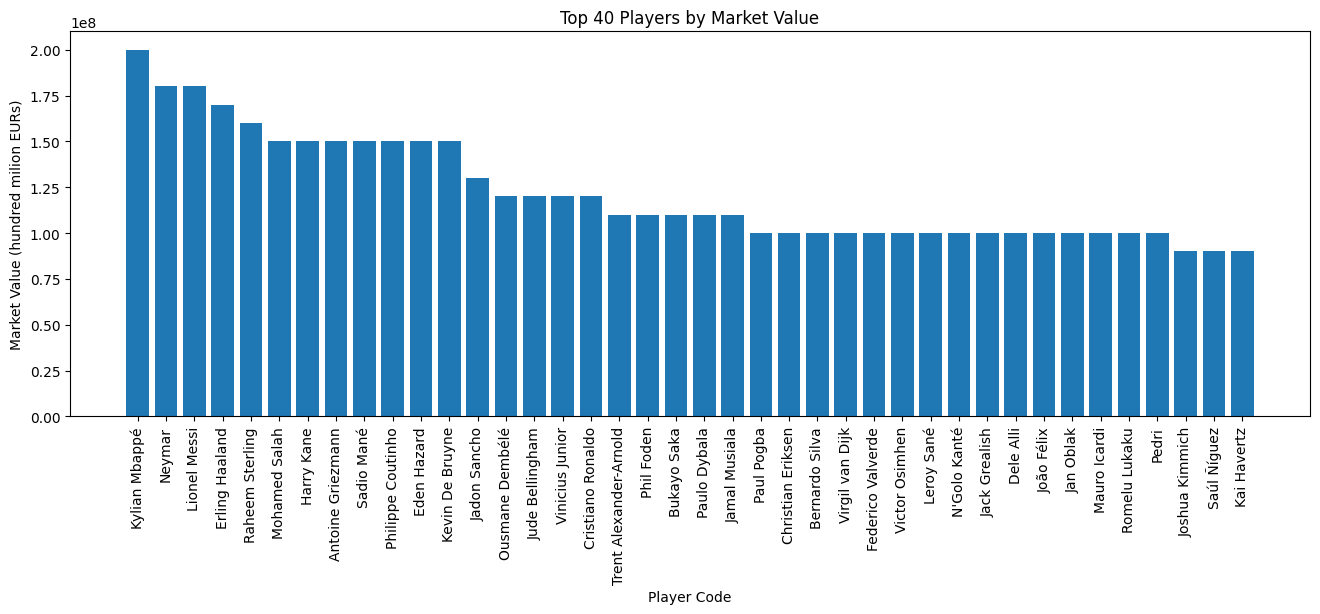

In [209]:
#find out 40 players with the highest market value ever
top_40_players = df3.groupby(['name'], as_index=False).highest_market_value_in_eur.max()
top_40_players = top_40_players.sort_values(by='highest_market_value_in_eur', ascending=False)[:40]

plt.figure(figsize=(16, 5))
plt.bar(top_40_players['name'], top_40_players['highest_market_value_in_eur'])
plt.xlabel('Player Code')
plt.ylabel('Market Value (hundred milion EURs)')
plt.title('Top 40 Players by Market Value')
plt.xticks(rotation=90)
plt.show()

Whether striker being dominant both foots can be more expensive?

In [210]:
a = df3[(df3.sub_position=='Centre_Forward')&(df3.foot=='both')]
b = df3[(df3.sub_position=='Centre_Forward')&(~(df3.foot=='both'))]

In [211]:
df3.position.unique()

array(['Midfield', 'Attack', 'Goalkeeper', 'Defender'], dtype=object)

In [212]:
df3.sub_position.unique()

array(['Central_Midfield', 'Left_Winger', 'Defensive_Midfield',
       'Goalkeeper', 'Centre_Back', 'Centre_Forward', 'Right_Winger',
       'Left_Back', 'Right_Back', 'Attacking_Midfield', 'Second_Striker',
       'Left_Midfield', 'Right_Midfield'], dtype=object)

In [213]:
a.shape

(2039, 20)

In [214]:
b.shape

(35135, 20)

Text(0.5, 1.0, 'Comparison of Distributions: a vs b')

<Figure size 1000x3000 with 0 Axes>

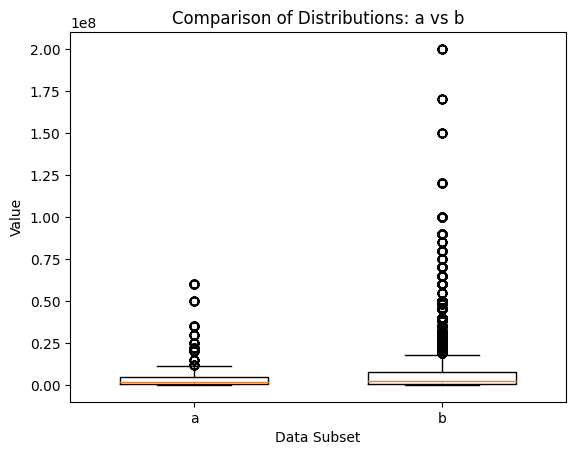

In [215]:
#Comparing between dominant in both foots and one foot
plt.figure(figsize=(10,30))
fig, ax = plt.subplots()

boxplot_a = ax.boxplot(a['highest_market_value_in_eur'], positions=[1],widths=0.6)
boxplot_b = ax.boxplot(b['highest_market_value_in_eur'], positions=[2],widths=0.6)

ax.set_xticklabels(['a', 'b'])
ax.set_xlabel('Data Subset')
ax.set_ylabel('Value')
ax.set_title('Comparison of Distributions: a vs b')

In [216]:
a['highest_market_value_in_eur'].skew()

2.8684241632809986

In [217]:
b['highest_market_value_in_eur'].skew()

4.990818235154253

In [218]:
t_statistic, p_value = st.ttest_ind(a['highest_market_value_in_eur'],b['highest_market_value_in_eur'],alternative='less')

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: -3.7774899732527505
P-Value: 7.933184255171566e-05


We can statistically conclude that the Center Forwards being dominant two foots are more expensive in market value due to extremely small p-Value

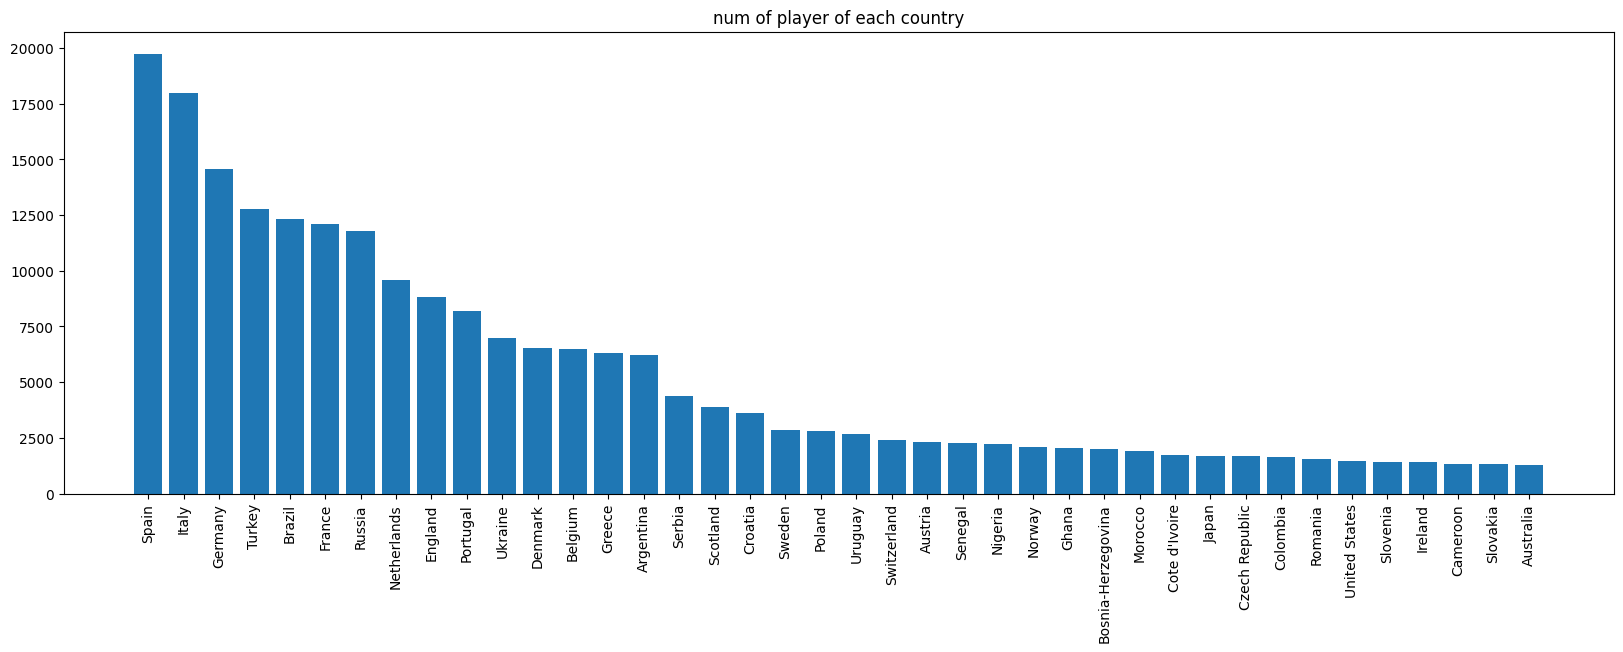

In [219]:
# List of countries having big amount of football players in transfermark
a=df3.groupby(['country_of_citizenship'],as_index=False).player_id.count().sort_values(by='player_id',ascending=False)[:40]
plt.figure(figsize=(20,6))
plt.bar(a.country_of_citizenship,a.player_id)
plt.title('num of player of each country')
ax.set_xticklabels([])
plt.xticks(rotation=90)
plt.show()

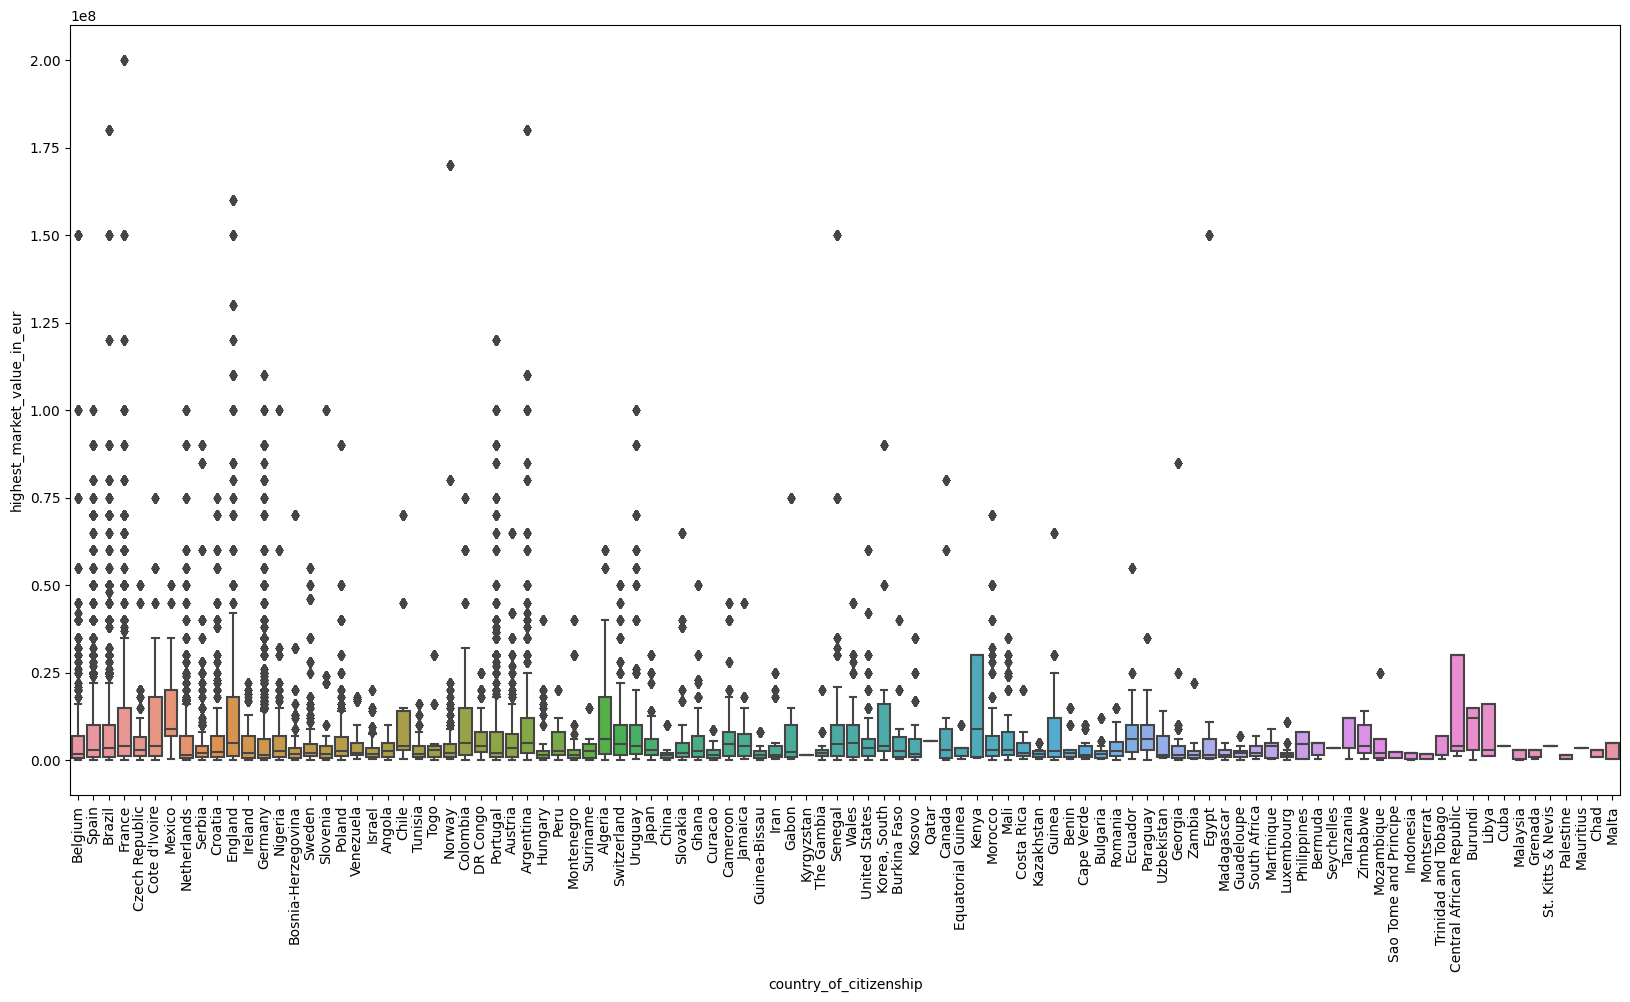

In [220]:
median = df3.groupby(['country_of_citizenship'],as_index=False)['highest_market_value_in_eur'].median().sort_values(by='highest_market_value_in_eur',ascending=False)[:100]
sorted_df = df3[df3['country_of_citizenship'].isin(median.country_of_citizenship)]

plt.figure(figsize=(20,10))
sns.boxplot(data=sorted_df,x='country_of_citizenship',y='highest_market_value_in_eur')
plt.xticks(rotation=90)
plt.show()

In [221]:
# Find out the max value of each football player in 2022
a=df3[df3.year==2022].groupby(['country_of_citizenship','position','name'],as_index=False).market_value_in_eur_x.max()

#Ranking football player by position and by national team
a['rank'] = a.groupby(['country_of_citizenship','position'],as_index=False).market_value_in_eur_x.rank(method='first', ascending=False)

#Find out the 4-3-3_squad for each national team
b = a[((a['rank']==1)&(a.position=='Goalkeeper'))|((a['rank'].isin([1,2,3,4]))&(a.position=='Defender'))|((a['rank'].isin([1,2,3]))&
 (a.position=='Midfield'))|((a['rank'].isin([1,2,3]))&(a.position=='Attack'))]

#Sorting team which having enough 11 players
c=b.groupby(['country_of_citizenship'],as_index=False).name.count()
d=c[c.name==11].country_of_citizenship

#Visualizing data
px.bar(b[b.country_of_citizenship.isin(d)]
       .groupby(['country_of_citizenship'],as_index=False).market_value_in_eur_x.sum().sort_values(by='market_value_in_eur_x',ascending=False),
       x='country_of_citizenship',y='market_value_in_eur_x',title='Most expensive national team in 2022')

In [222]:
e=b[b.country_of_citizenship.isin(d)]
e

,country_of_citizenship,position,name,market_value_in_eur_x,rank
6,Albania,Attack,Armando Broja,30000000.0,1.0
14,Albania,Attack,Giacomo Vrioni,2500000.0,3.0
16,Albania,Attack,Myrto Uzuni,8000000.0,2.0
32,Albania,Defender,Berat Djimsiti,13000000.0,1.0
33,Albania,Defender,Elseid Hysaj,4000000.0,3.0
...,...,...,...,...,...
14541,Wales,Defender,Neco Williams,18000000.0,2.0
14548,Wales,Goalkeeper,Danny Ward,8000000.0,1.0
14551,Wales,Midfield,Aaron Ramsey,3000000.0,2.0
14552,Wales,Midfield,Ben Woodburn,1000000.0,3.0


In [223]:
px.bar(e, x= 'country_of_citizenship', y='market_value_in_eur_x', color='position',barmode='stack')

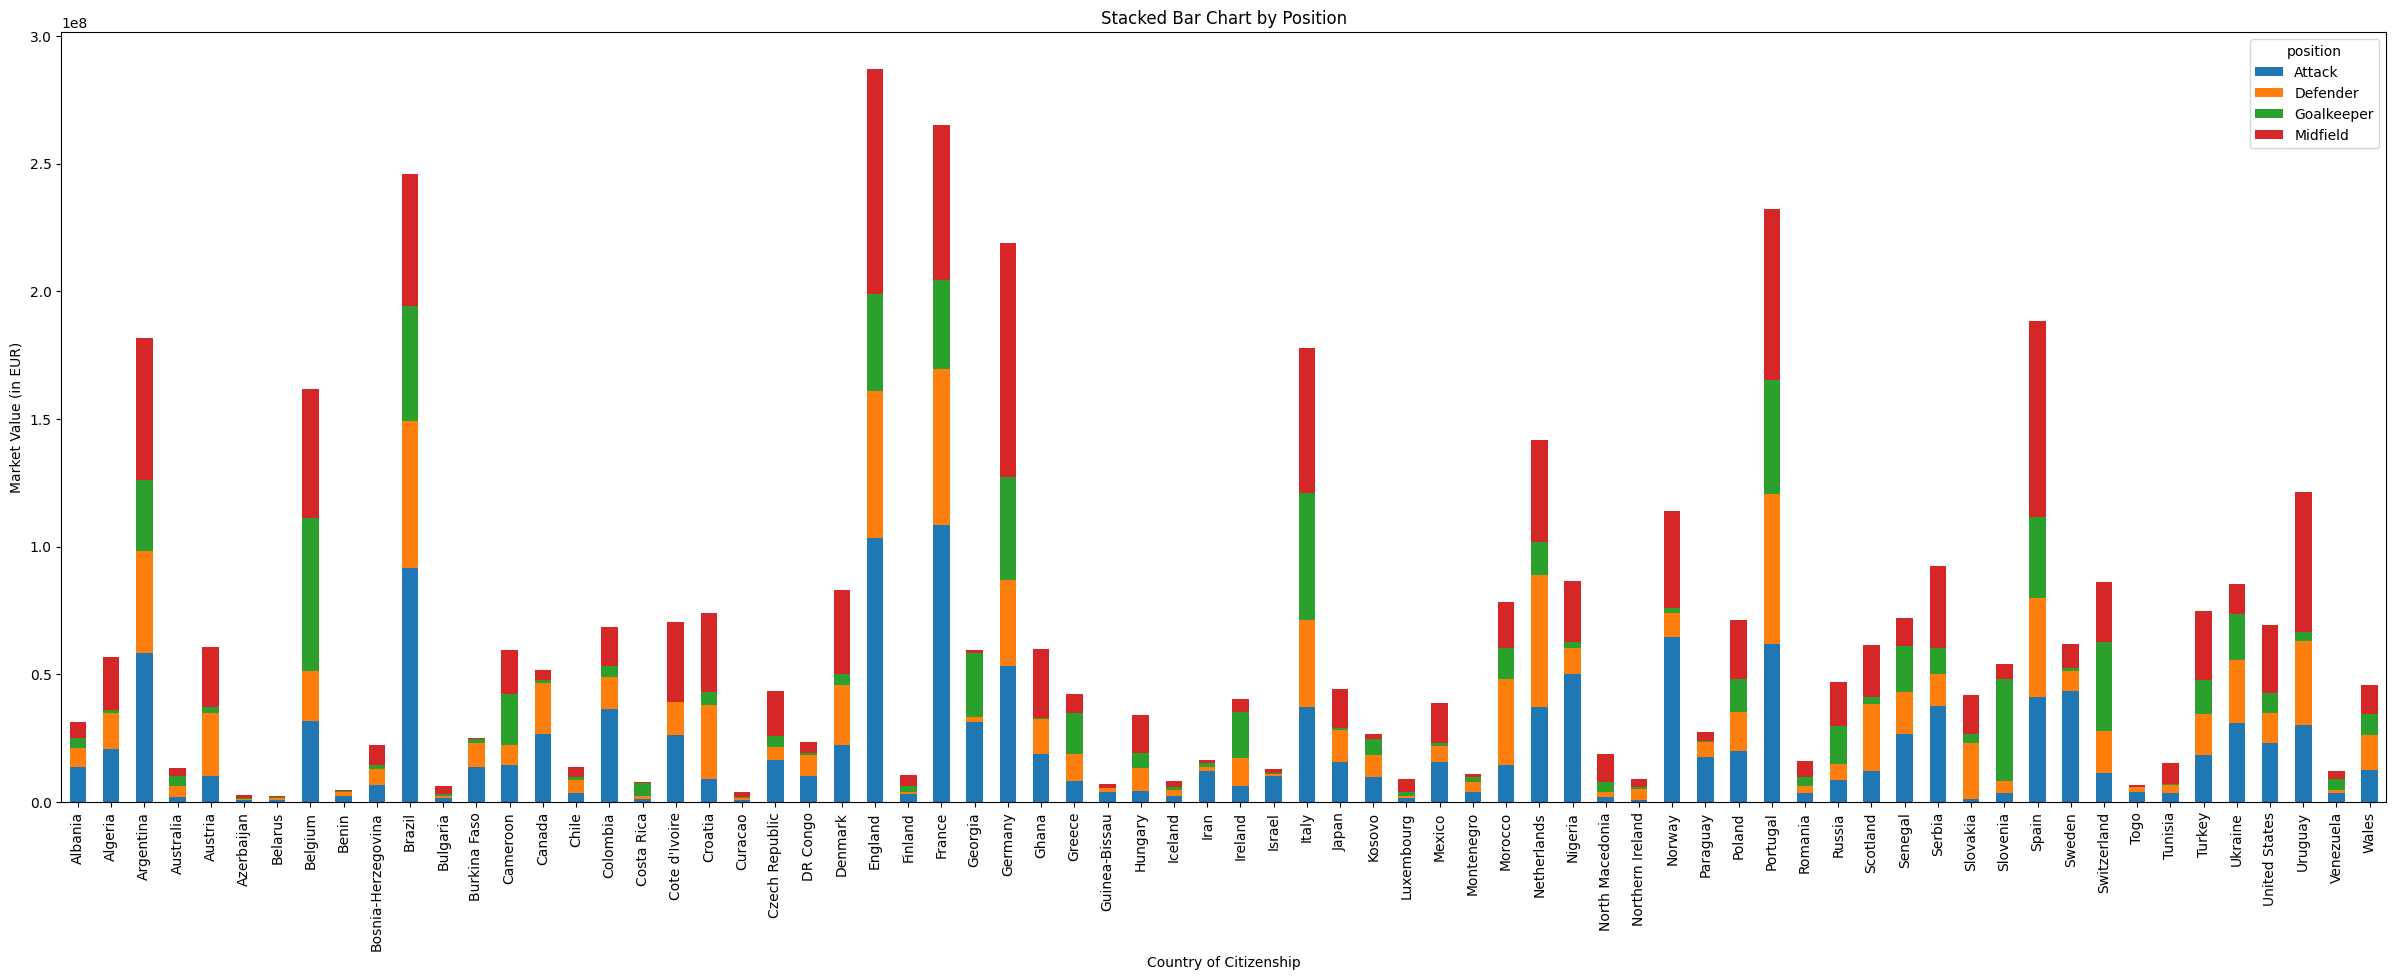

In [224]:
# Pivot the data using pandas pivot_table
pivot_table = pd.pivot_table(e, values='market_value_in_eur_x', index='country_of_citizenship', columns='position')

# Plot the stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(30,10))

# Add labels and legend
plt.xlabel('Country of Citizenship')
plt.ylabel('Market Value (in EUR)')
plt.title('Stacked Bar Chart by Position')

# Display the plot
plt.show()


<ipython-input-225-c0daec6f1dc5>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

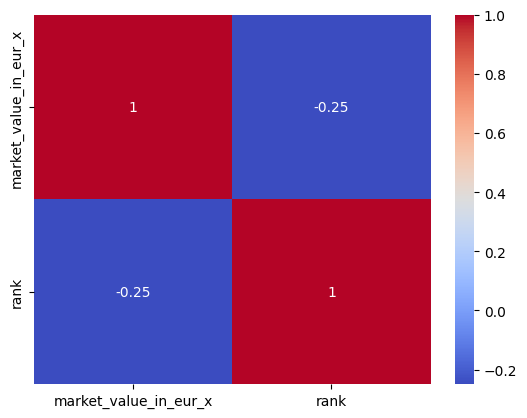

In [225]:
sns.heatmap(e.corr(),cmap='coolwarm',annot=True) 